<a href="https://colab.research.google.com/github/DaniAyash/Data-Analysis-Project/blob/main/Data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# 1. Dataset Selection

In [ ]:
# 1. Dataset Selection
pd.set_option('display.max_columns', None)  # Display all columns
df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Youth_Risk_Behavior_Surveillance_System.csv')

# 2. Data Understanding (small explanation of data set columns and example for understanding)

In [ ]:
# 2. Data Understanding (small explanation of data set columns and example for understanding)

'''
מה הקובץ מכיל?
זה קובץ נתונים מתוך מערכת Youth Risk Behavior Surveillance System (בקיצור YRBSS) – מערכת אמריקאית שמנטרת התנהגויות של נוער שיכולות להשפיע על הבריאות שלהם.
בתוך הקובץ יש מידע על:

תזונה 🥗

פעילות גופנית 🏃‍♂️

השמנה בילדים ונוער ⚖️

'''

# 📄 קובץ נתונים
#
# ├──> כל שורה = תוצאה של סקר
#
# ├── YearStart-YearEnd 📅
# │    └── איזו שנה נערך הסקר
#
# ├── LocationDesc 🌎
# │    └── באיזו מדינה (או אזור)
#
# ├── Topic 🏃‍♂️🍎
# │    └── נושא כללי (תזונה, פעילות גופנית, ישיבה מול מסך וכו')
#
# ├── Question ❓
# │    └── שאלה מדויקת ששאלו (לדוגמה: "כמה שעות ביום אתה פעיל?")
#
# ├── Answer percentage 👥
# │    └── כמה תלמידים ענו על השאלה לחיוב באחוזים
#
# ├── Answer amount 👥
# │    └── כמה תלמידים ענו על השאלה לחיוב במספר
#
# ├── Amount of participants 📈
# │    └── אחוז העונים החיוביים מתוך המדגם
#
# ├── Low_Confidence_Limit ↘️
# │    └── הגבול התחתון של טווח הביטחון
#
# └── High_Confidence_Limit ↗️
#      └── הגבול העליון של טווח הביטחון
#
# └── Race/Grade/Gender ↗️
#      └── עמודה שכוללת מידע משולב של לאום כיתה ומגדר

'''Year | LocationDesc | Question | Gender | Race | Grade | Data_Value | Low_Confidence_Limit | High_Confidence_Limit | Sample_Size
   2017 | Texas |Ate fruits 1+ times/day|Female|All| All  | 38.7       | 36.5                 | 40.9                  | 1087'''

'''
מה זה אומר?

בשנת 2017

במדינת טקסס

השאלה הייתה "כמה פעמים אכלת פירות ביום", ומדדו אכילת פירות לפחות פעם ביום

הקבוצה שנבדקה: נשים

מכלל הגזעים וכלל הכיתות

התוצאה המרכזית (Data_Value) היא: 38.7% מהנבדקות ענו שהן אוכלות פירות לפחות פעם ביום.

טווח הביטחון:

תחתון (Low_Confidence_Limit) = 36.5%

עליון (High_Confidence_Limit) = 40.9%
➔ כלומר: יש 95% ביטחון שהתוצאה האמיתית באוכלוסייה נמצאת בין 36.5% ל-40.9%.

מספר הנבדקות (Sample_Size) = 1087.
'''

'\nמה זה אומר?\n\nבשנת 2017\n\nבמדינת טקסס\n\nהשאלה הייתה "כמה פעמים אכלת פירות ביום", ומדדו אכילת פירות לפחות פעם ביום\n\nהקבוצה שנבדקה: נשים\n\nמכלל הגזעים וכלל הכיתות\n\nהתוצאה המרכזית (Data_Value) היא: 38.7% מהנבדקות ענו שהן אוכלות פירות לפחות פעם ביום.\n\nטווח הביטחון:\n\nתחתון (Low_Confidence_Limit) = 36.5%\n\nעליון (High_Confidence_Limit) = 40.9%\n➔ כלומר: יש 95% ביטחון שהתוצאה האמיתית באוכלוסייה נמצאת בין 36.5% ל-40.9%.\n\nמספר הנבדקות (Sample_Size) = 1087.\n'

# 3. Data Cleaning and Preparation

In [ ]:
# 3. Data Cleaning and Preparation
columns_to_drop = ["Data_Value_Unit","Data_Value_Footnote_Symbol",
                   "Data_Value_Footnote","Data_Value_Alt","Data_Value_Type",
                   "ClassID","TopicID","QuestionID","DataValueTypeID","LocationAbbr","Total","Sex",
                   "StratificationCategory1","StratificationCategoryId1","StratificationID1",
                   "Race/Ethnicity","Grade","YearEnd","GeoLocation"]  # we deleted unnecessary columns to make the dataframe cleaner

df = df.drop(columns=columns_to_drop, errors='ignore')

df.rename(columns={'Data_Value':'Answer percentage', # we changed column names to make the dataframe clearer
                   'Low_Confidence_Limit':'Minimum real evaluation',
                   'High_Confidence_Limit ':'Maximum real evaluation',
                   'Sample_Size' : 'Amount of participants',
                   'Stratification1' : 'Race/Grade/Gender',}
                   ,inplace=True)

df = df.dropna(subset=['Answer percentage', 'Minimum real evaluation',
                       'Maximum real evaluation']) # we deleted rows with missing data in them

location_drop= ['California', 'Guam', 'Pennsylvania', 'Puerto Rico', 'Virgin Islands']
df = df[~df['LocationDesc'].isin(location_drop)]
#df.drop(df[df['LocationDesc'].isin(location_drop)]) # dropped state which almost didn't appear (survey participance was very low)
#df['Grade'] = df['Grade'].fillna('Unregistered grade') #fills undefined in empty cells of Race/Ethnicity column

# 4. Data Transformation

In [ ]:
# 4. Data Transformation
df['Answer amount'] = (df['Answer percentage'] / 100) * df['Amount of participants'] # calculate how much (in number) is the answer percentage out of all participants in survey
df['Answer amount'] = np.ceil(df['Answer amount']).astype(int) #round the amount number and make it integer

# we moved 'Answer amount' column to be after 'Answer percentage'
col_to_move = 'Answer amount'
col_index = df.columns.get_loc('Answer percentage') + 1  # find index to insert after (we want it after "Answer percentage")
column = df.pop(col_to_move)                      # remove the column
df.insert(col_index, col_to_move, column)         # insert again in the new position

# turning the values on the survey participants from floats to integers, it is more logical.
df["Amount of participants"] = df["Amount of participants"].astype(int)

# Data Univariate

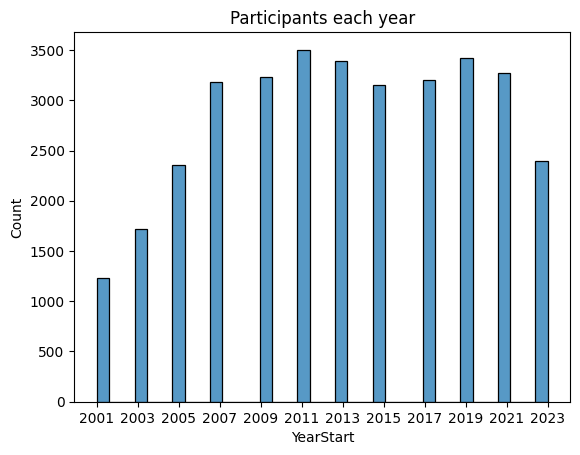

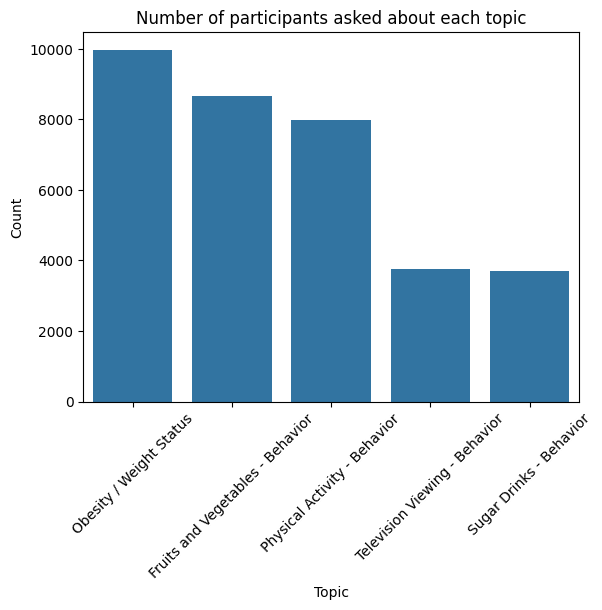

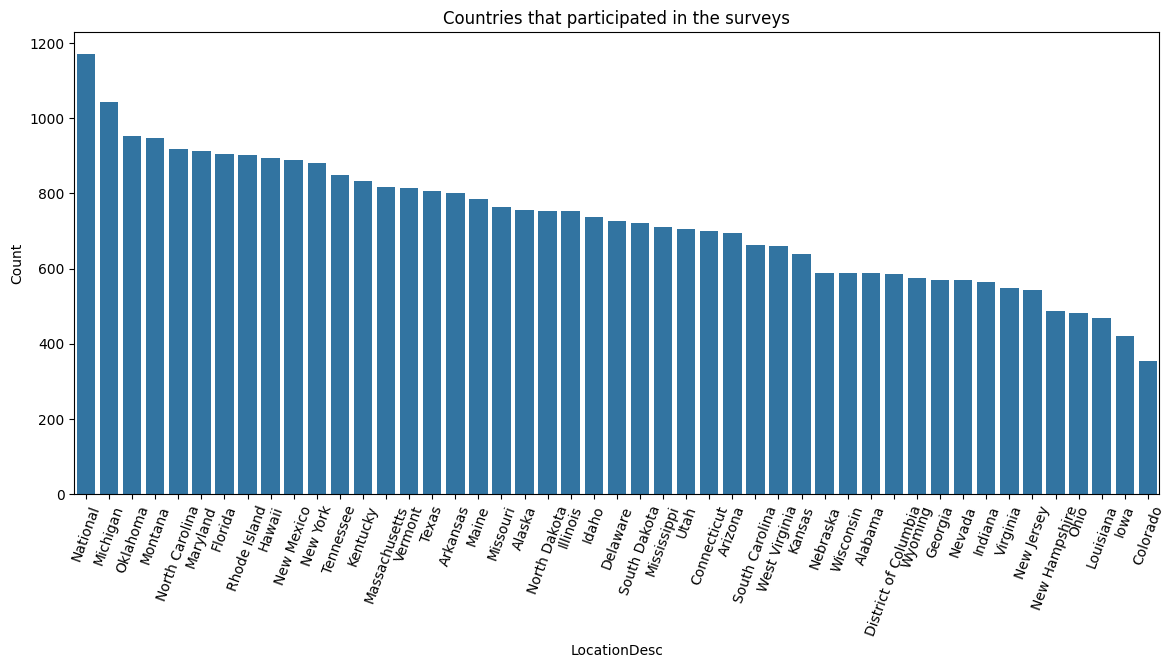

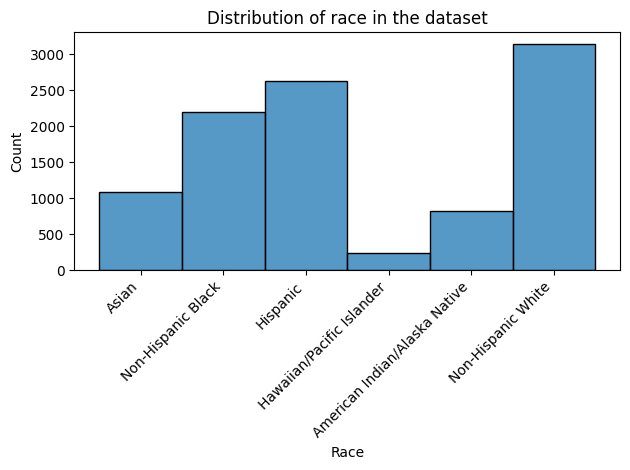

In [ ]:
#Year
#Total number of participants each year
yearS= df['YearStart']
sns.histplot(yearS)
unique_years = sorted(df['YearStart'].unique())
plt.xticks(unique_years)
plt.title('Participants each year')
plt.show()

#Topic
#Number of participants asked about each topic
# ספירת רשומות בכל נושא
topic_counts = df['Topic'].value_counts()
plt.title('Number of participants asked about each topic')
# יצירת הגרף
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.ylabel('Count')
plt.show()

#LocationDesc
#All countries surveyed for the surveys conducted
location_counts = df['LocationDesc'].value_counts()
plt.figure(figsize=(14, 6))
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.xticks(rotation=70)  # Rotate x-axis labels for readability
plt.title('Countries that participated in the surveys')
plt.ylabel('Count')
plt.show()

#Race
#Distribution of nationality by the amount of population that participated in the surveys
# Filter for only Race values in 'Race/Grade/Gender'
race_values= ['Asian','Hispanic','Non-Hispanic White','Non-Hispanic Black','Hawaiian/Pacific Islander','American Indian/Alaska Native']
filtered_race_data = df[df['Race/Grade/Gender'].isin(race_values)]['Race/Grade/Gender']
# Plot the distribution of races
sns.histplot(filtered_race_data)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of race in the dataset')
plt.xlabel('Race')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 6+7. Data Exploration + Data Multivariate Visualization

1376.197329995828


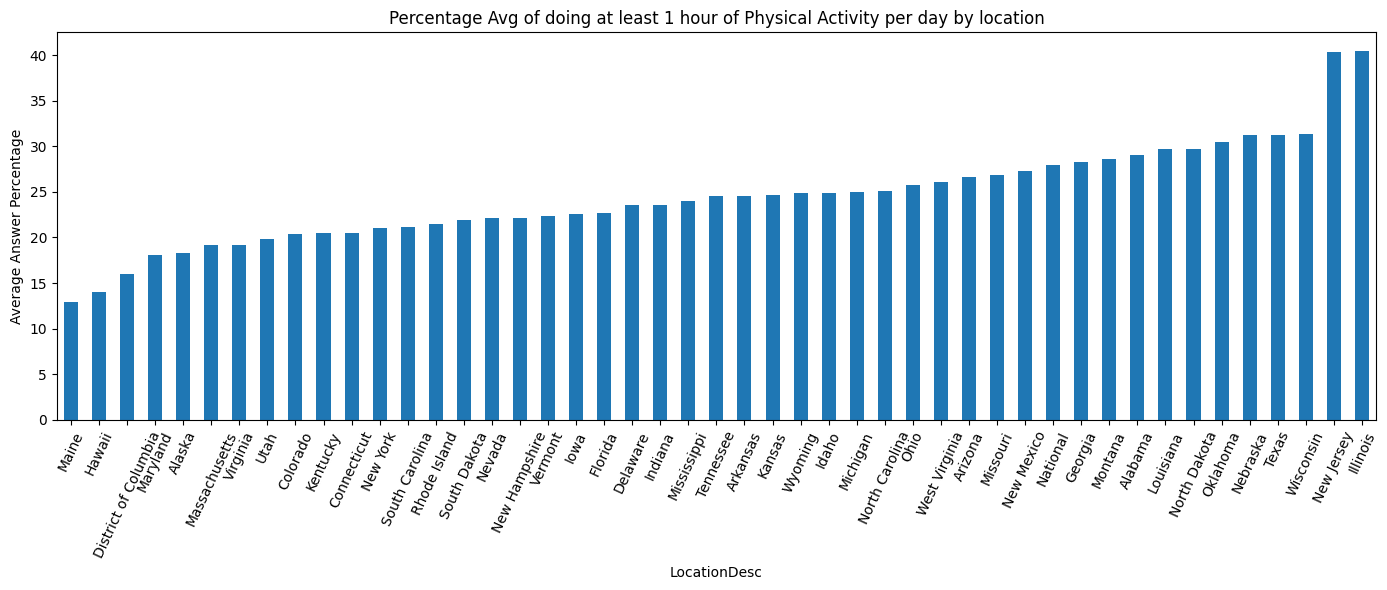

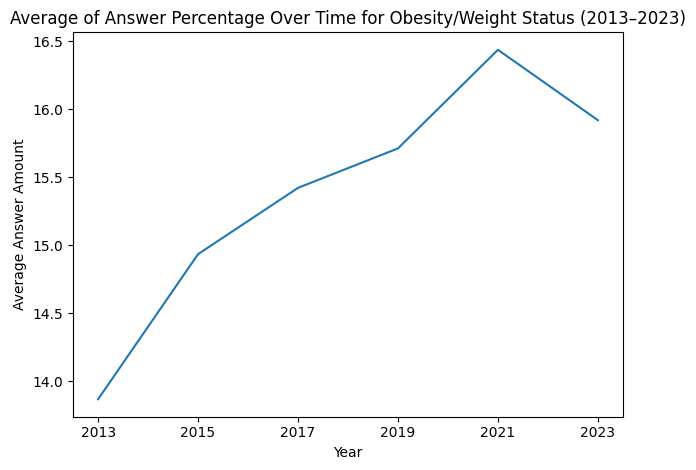

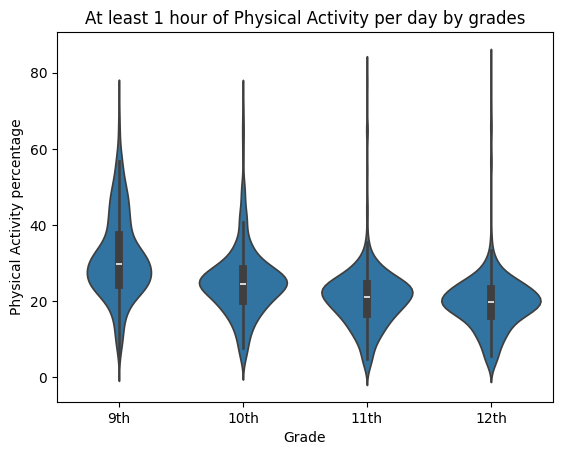

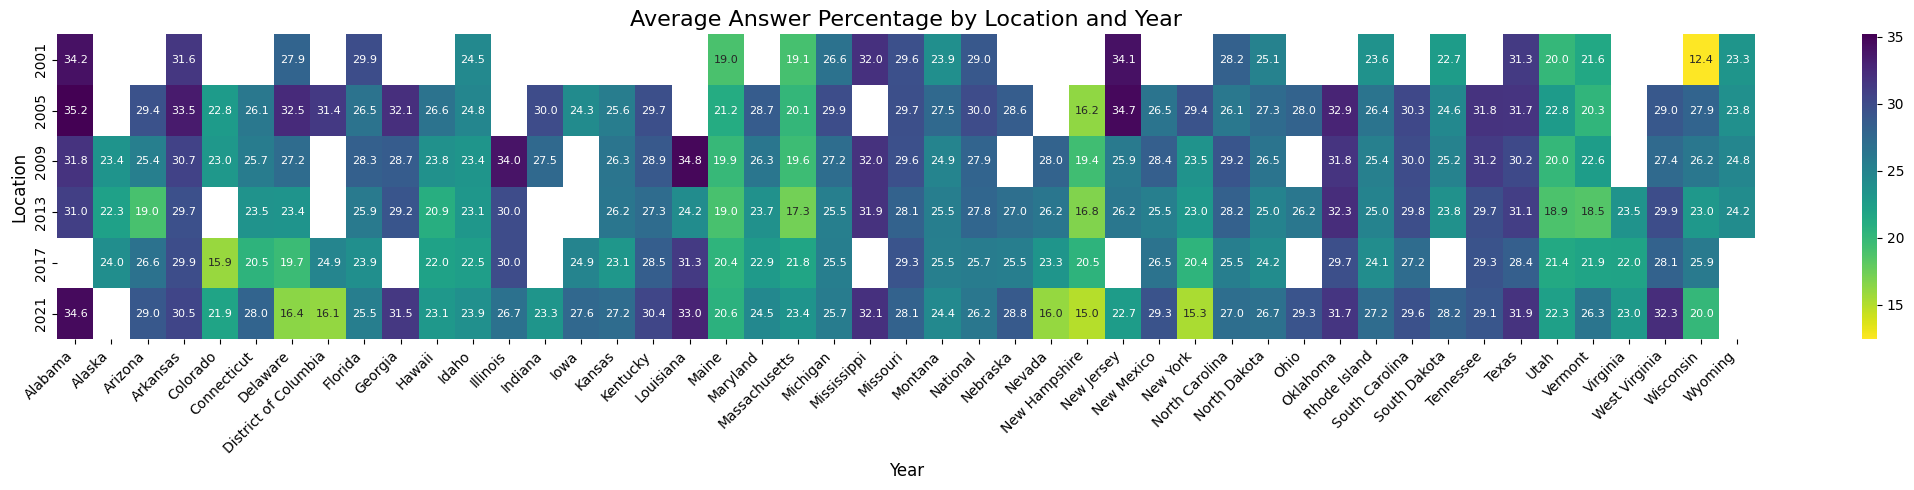

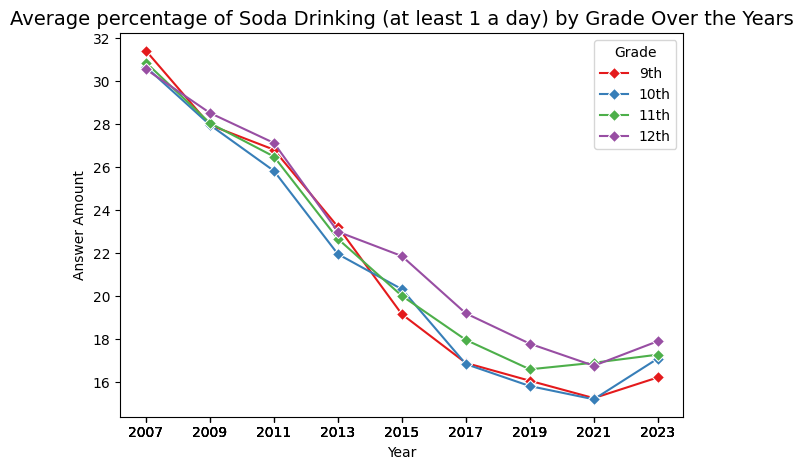

In [ ]:
#6. Data Exploration + 7. Data Visualization
# בדיקה של משימה שקשורה לחלק 6 (בחרתי שנה וקיבצתי לפיה את הממוצע של מספר המשתתפים בסקר באותה שנה)
year_2023 = df[df["YearStart"] == 2023]
average_participants_2023 = year_2023['Amount of participants'].mean()
print(average_participants_2023)

# Question analyzed - Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily.
# עשיתי גרף של ממוצע אחוזי העונים לחיוב על הסקר על הנושא הראשון של פעילות גופנית בכל מדינה
first_topic = df[df["Topic"] == "Physical Activity - Behavior"] # get all rows of first topic
avg_percentage_first_topic_2023 = first_topic.groupby("LocationDesc")["Answer percentage"].mean().sort_values() # grouping by answer percentage of each state and doing avergae
#display(avg_percentage_first_topic_2023) # דיבאג

# bar plot to show the data
avg_percentage_first_topic_2023.plot(kind='bar', figsize=(14,6))
plt.ylabel('Average Answer Percentage')
plt.title('Percentage Avg of doing at least 1 hour of Physical Activity per day by location')
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

# אפשר למשל ללמוד מזה שבמדינת ניו ג'רזי ואלינוי עושים הכי הרבה פעילות גופנית על פי ההמצעים בקרב תלמידים ובמדינות הוואי ומיין הככי פחות

# Question analyzed - Percent of students in grades 9-12 who have an overweight classification.
# פה עשייתי גרף של ממוצע התלמידים שענו על סקר השמנה לחויב  - שהם סובלים מהשמנה - בין שנים 2013 ל 2023 (ממוצע לכל שנה)
obesity_2013_to_2023 = df[(df["Topic"] == "Obesity / Weight Status") & ((df['YearStart'] >= 2013) & (df['YearStart'] <= 2023))] # obesity check between 2013 to 2023
avg_obesity_2013_to_2023 = obesity_2013_to_2023.groupby("YearStart")["Answer percentage"].mean().reset_index() # i grouped each year by the avergae of the amount of positive answers for obesity
obesity_2013_to_2023_participants = obesity_2013_to_2023['Amount of participants'].mean()
#avg_stats_by_year = obesity_2013_to_2023.groupby("YearStart")[["Answer amount", "Amount of participants"]].mean()
#display(avg_stats_by_year)

# line plot to show the data
sns.lineplot(data = avg_obesity_2013_to_2023, x='YearStart', y='Answer percentage') # the reset_index turned it back to df, with index - YearStart and values - Answer amout - that's why we can use it here
plt.title("Average of Answer Percentage Over Time for Obesity/Weight Status (2013–2023)")
plt.ylabel('Average Answer Amount')
plt.xlabel('Year')
plt.xticks(avg_obesity_2013_to_2023['YearStart'])  # shows all the years that has obesityy topic on the survey
plt.tight_layout()
plt.show()

#  מזה אפשר ללמוד שבין שנים 2013 ל 2023 ממוצע ההשמנה הגבוה ביותר טיפס לכיוון שנה אחת שהיא 2021 - העליה בשנת 2021 כנראה בגלל הקורונה

# define grade filtering of the Race/Grade/Gender column.
grade_order = ['9th', '10th', '11th', '12th']

# Question analyzed - Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily.
# בדיקה של כמה תלמידים מכל כיתה במשך כל השנים הצביעו שעושים ספורט לפחות שעה אחת ביום.
filtered_df = df[(df['Topic'] == 'Physical Activity - Behavior') & (df['Race/Grade/Gender'].isin(grade_order))]

sns.violinplot(x='Race/Grade/Gender', y='Answer percentage', data=filtered_df)
plt.title('At least 1 hour of Physical Activity per day by grades')
plt.xlabel('Grade')
plt.ylabel('Physical Activity percentage')
plt.show()
# אפשר ללמוד מזה שבכיתות נמוכות יותר תלמידים עושים יותר ספורט וזזים יותר וככל שעולים בגיל הממוצע פעילות גופנית קצת יורד.


#########################
# Filter the original DataFrame to include only the desired years
years_to_include = [year for year in sorted(df['YearStart'].unique()) if 2001 <= year <= 2023 and (year - 2001) % 4 == 0]
df_filtered_years = df[df['YearStart'].isin(years_to_include)].copy()
# Create the crosstab data from the filtered DataFrame
crosstab_data = pd.crosstab(df_filtered_years['YearStart'], df_filtered_years['LocationDesc'], values=df_filtered_years['Answer percentage'], aggfunc='mean')
# Create the heatmap with adjusted figure size and annotation font size
plt.figure(figsize=(22, 5)) # הגדלת גודל הפיגר (התאם לפי הצורך)
sns.heatmap(crosstab_data, annot=True, cmap='viridis_r', fmt=".1f", annot_kws={"size": 8}) # הוספת annot_kws להקטנת גודל הגופן
plt.title('Average Answer Percentage by Location and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.xticks(rotation=45, ha='right') # סיבוב תוויות ציר ה-X לשיפור הקריאות
plt.tight_layout() # התאמת הפריסה כדי למנוע חיתוך של תוויות
plt.show()


# Question analyzed - Percent of students in grades 9-12 who drank regular soda/pop at least one time per day.
soda_df = df[df['Topic'] == 'Sugar Drinks - Behavior']
soda_df_age = soda_df[soda_df['Race/Grade/Gender'].isin(grade_order)]
soda_df_age_mean = soda_df_age.groupby(['YearStart', 'Race/Grade/Gender'])['Answer percentage'].mean().reset_index()
soda_df_age_mean_participants = soda_df_age['Amount of participants'].mean()

# Convert the column to a categorical type with the correct order
soda_df_age_mean['Race/Grade/Gender'] = pd.Categorical(
    soda_df_age_mean['Race/Grade/Gender'],
    categories=grade_order,
    ordered=True
)

# Now sort the dataframe by the categorical column (optional but useful)
soda_df_age_mean.sort_values(['YearStart', 'Race/Grade/Gender'], inplace=True)

# graph for showing the average Soda Drinking Answer Amount by Grade Over Years
sns.lineplot(data=soda_df_age_mean, x='YearStart', y='Answer percentage', hue='Race/Grade/Gender', marker='D', palette='Set1')
plt.title("Average percentage of Soda Drinking (at least 1 a day) by Grade Over the Years", fontsize=14)
plt.xlabel('Year')
plt.ylabel('Answer Amount')
plt.legend(title='Grade')
plt.xticks(soda_df_age_mean['YearStart'])
plt.tight_layout()
plt.show()
# אפשר ללמוד מזה שבכיתות נמוכות יותר תלמידים צורכים יותר משקאות ממותקים וככל שמתבגרים זה פוחת, ובאופן כללי חלה ירידה מ 2015 עד 2021 ואז עליה כנראה בגלל הקורונה.

# 8. Aggregation and Grouping (Pivoting + Heatmaps)

,Race/Grade/Gender,All years mean percentage
0,9th,30.962500
1,10th,29.240556
2,11th,27.207500
3,12th,26.677716


Answer percentage
Race/Grade/Gender Topic                                              
Male              Fruits and Vegetables - Behavior          41.316113
                  Obesity / Weight Status                   15.745075
                  Physical Activity - Behavior              30.021622
                  Sugar Drinks - Behavior                   25.500000
                  Television Viewing - Behavior             29.412778
Female            Fruits and Vegetables - Behavior          42.806150
                  Obesity / Weight Status                   12.711242
                  Physical Activity - Behavior              19.199459
                  Sugar Drinks - Behavior                   18.694675
                  Television Viewing - Behavior             28.015000

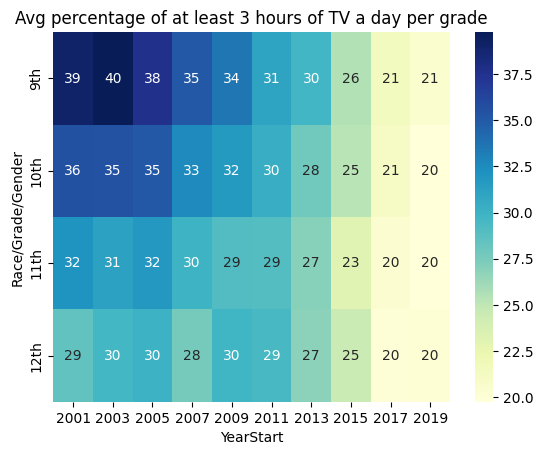

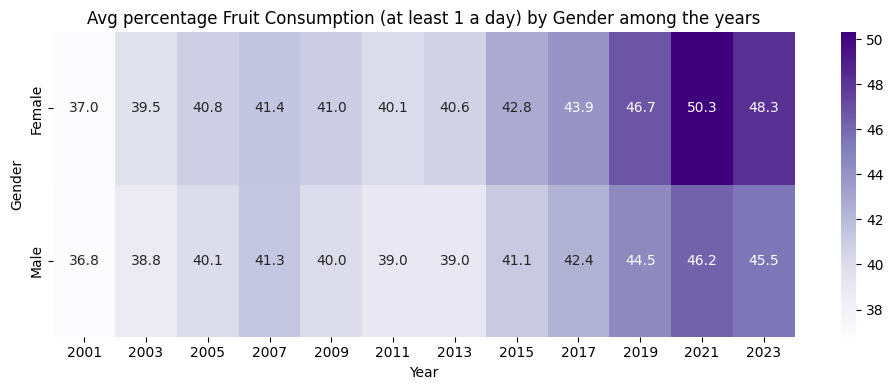

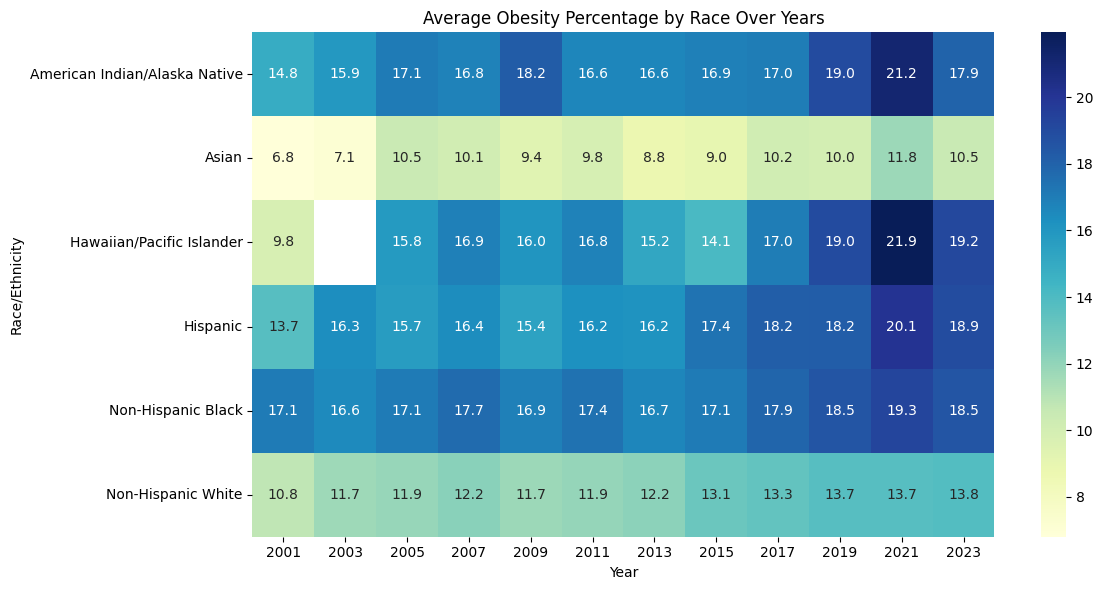

In [ ]:
# Question analyzed = Percent of students in grades 9-12 watching 3 or more hours of television each school day.

# define grade filtering of the Race/Grade/Gender column.
grade_order = ['9th', '10th', '11th', '12th']
gender_list = ['Male','Female']

# grouping by general percentage average of all grades and their habit of watching television
# grade_df = df[df['Race/Grade/Gender'].isin(grade_order)]  ----->  # DOING THIS INSTEAD OF LINE 9 , MAYBE WE WILL DELETE Grade COLUMN AND WORK WITH Race/Grade/Gender.
tele_viewing = df[df['Topic'] == "Television Viewing - Behavior"]
tele_viewing = tele_viewing[tele_viewing['Race/Grade/Gender'].isin(grade_order)]
general_mean_tele_viewing = tele_viewing.groupby("Race/Grade/Gender")["Answer percentage"].mean()
general_mean_tele_viewing = general_mean_tele_viewing.sort_values(ascending=False)

display(general_mean_tele_viewing.reset_index(name='All years mean percentage'))

# pivot with double index of gender and the second index is the topic they answered, and as a column the average of the positive answer percenatge
pivot = df.pivot_table(
    values='Answer percentage',
    index=['Race/Grade/Gender', 'Topic'],
    aggfunc='mean'
)
pivot = pivot.loc[gender_list]
display(pivot)

# pivoting the percentage average of all grades scattered over the years the tv watching survey took place
pivot = tele_viewing.pivot_table(
    values='Answer percentage',
    index='Race/Grade/Gender',
    columns='YearStart',
    aggfunc='mean'
)
# ploting it
pivot = pivot.loc[grade_order]
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title("Avg percentage of at least 3 hours of TV a day per grade")
plt.show()

# filtering info, choosing the topic we want and leaving the genders.
fruit_consumption = df[df['Topic'] == "Fruits and Vegetables - Behavior"]
gender_fruit_consumption = fruit_consumption[fruit_consumption['Race/Grade/Gender'].isin(gender_list)]

# pivoting the average percentage of fruit/vegtable consumption by gender among the years
pivot = gender_fruit_consumption.pivot_table(
    values='Answer percentage',
    index='Race/Grade/Gender',
    columns='YearStart',
    aggfunc='mean'
)

# ploting it
plt.figure(figsize=(10, 4))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="Purples")
plt.title("Avg percentage Fruit Consumption (at least 1 a day) by Gender among the years")
plt.xlabel("Year")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()

# זה סבבה?
# do pivot about obesity among different races
# Filter for 'Obesity / Weight Status' topic
obesity_df = df[df['Topic'] == 'Obesity / Weight Status'].copy()

# Define race values to include
race_values = ['Asian','Hispanic','Non-Hispanic White','Non-Hispanic Black','Hawaiian/Pacific Islander','American Indian/Alaska Native']
# Filter for the defined race values in 'Race/Grade/Gender'
obesity_race = obesity_df[obesity_df['Race/Grade/Gender'].isin(race_values)].copy()
# Create the pivot table
pivot_obesity_race = obesity_race.pivot_table(
    values='Answer percentage',
    index='Race/Grade/Gender',
    columns='YearStart',
    aggfunc='mean'
)
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_obesity_race, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average Obesity Percentage by Race Over Years")
plt.xlabel("Year")
plt.ylabel("Race/Ethnicity")
plt.tight_layout()
plt.show()

# 9. Insights and Conclusion

In [ ]:
# תובנות מהגרפים והנתונים :

# אפשר ללמוד מזה שבמדינת ניו ג'רזי ואלינוי עושים הכי הרבה פעילות גופנית על פי ההמצעים בקרב תלמידים ובמדינות הוואי ומיין הככי פחות
#  מ אפשר ללמוד שבין שנים 2013 ל 2023 ממוצע ההשמנה הגבוה ביותר טיפס לכיוון שנה אחת שהיא 2021 - העליה בשנת 2021 כנראה בגלל הקורונה
#פעילות גופנית לפי כיתה: תלמידים בכיתות נמוכות יותר נוטים לעשות יותר פעילות גופנית יומית בהשוואה לתלמידים בכיתות גבוהות יותר.
#השוואת תשובות לפי מיקום ושנה: מפת החום מאפשרת להשוות בקלות את ממוצע התשובות לשאלות הסקר בין מדינות ושנים נבחרות (במרווחים של 4 שנים).
#צריכת משקאות ממותקים לפי כיתה ולאורך זמן: תלמידים בכיתות נמוכות יותר שותים יותר משקאות ממותקים. לאורך השנים, הייתה ירידה כללית בין 2015 ל-2021, ולאחר מכן עלייה.
# אחוזי הצפייה בטלוויזיה גבוהים יותר בכיתות נמוכות מאשר גבוהות ולאורך כל השנים חלה ירידה גורפת בצפייה
# בנות אוכלות יותר בריא לעומת בנים במקצת ולאורך השנים חל שיפור בצריכת מאכלים בריאים באפון גורף
# באחוזי ההשמנה לאורך השנים לפי מגדר נראה שהאסייתים הכי רזים לעומת אפרו אמריקאים שאוכלים הכי הרבה, חלה עליה בהשמנה באופן גורף

# אתגרים בזמן העבודה על הפרויקט:
# כל אחד מאיתנו עם מערכת שעות שונה ולכן הגדרנו יום בשבוע שבו עבדנו על הפרויקט ושאר הזמן הגדרנו משימות ספציפיות לכל אחד.
# בחירת הדאטה סט לקחה לנו כמה ימים על מנת לחקור לעומק איזה דאטה סט הכי מובן ונכון לנו.
# נתקלנו בקשיים טכניים בשלב הניקוי והעיבוד של הנתונים, והתייעצנו עם המרצה ועשינו חיפושים עצמיים כדי לפתור אותם.
# הצגת הנתונים בצורה ויזואלית דרשה ניסוי של כמה גרפים שונים עד שמצאנו את אלו שממחישים את המידע הכי רלוונטי בצורה ברורה.

In [ ]:
# סקשן להרצת הדאטה פריים

df.to_csv("Updated_Nutrition_dataframe.csv", index=False) # בדיקה לראות אם טוען שינויים לקובץ אקסל חדש
# אחרי שתטעני את זה הקובץ יופיע תוך כמה שניות ברשימת תיקיות בצד
display(df)

,YearStart,LocationDesc,Datasource,Class,Topic,Question,Answer percentage,Answer amount,Minimum real evaluation,Maximum real evaluation,Amount of participants,LocationID,Race/Grade/Gender
14,2023,Alaska,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve...,17.4,78,13.9,21.6,444,2,9th
15,2023,Alaska,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve...,18.8,58,13.5,25.5,305,2,10th
16,2023,Alaska,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve...,16.9,40,12.3,22.8,234,2,11th
17,2023,Alaska,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve...,19.2,26,12.2,29.0,134,2,12th
18,2023,Alaska,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve...,17.4,27,11.9,24.9,150,2,2 or more races
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50085,2001,Wyoming,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who partici...,29.7,64,20.6,40.7,213,56,Hispanic
50088,2001,Wyoming,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who partici...,30.6,669,24.8,37.2,2184,56,Non-Hispanic White
50089,2001,Wyoming,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who partici...,27.8,349,21.9,34.5,1255,56,Female
50090,2001,Wyoming,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who partici...,34.0,441,27.3,41.5,1295,56,Male
